### IDs:
Insert yours IDs to the cell below

ID #1:

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


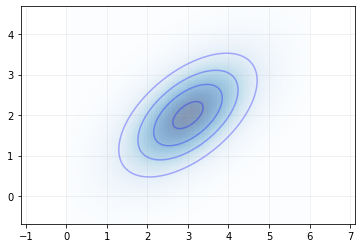

In [1]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

### Question 3 - Heavy Tailed distributions (10 points)

Recall the definition of Heavy Tailed distribtion from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

#### 3.A
Does the standard normal distribution have a heavy right tail? prove your answer.

#### 3.B
Does the standard log-normal distribution have a heavy right tail? prove your answer.

### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, $X_0$, is $U(1...6)$, i.e. $P(X_0=i)=\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$<br>
After i rolls are determined the $i+1^{st}, X_{i+1},$ is drawn according to the row that corresponds to the value of $X_i$ in the matrix $T$ below. <br>
In other words, $T$ is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

In [209]:
import warnings
import numpy as np
import scipy
from scipy import stats, log
import matplotlib.pyplot as plt
from scipy.stats import lognorm, kendalltau, pearsonr, spearmanr
import random
import matplotlib.mlab as mlab
import seaborn as sns
from scipy.stats import norm
import matplotlib.mlab as mlab
import pandas as pd


warnings.filterwarnings('ignore')


def round_state(p_list):
    return np.array([round(p,3) for p in p_list])


T = np.array([[0.4, 0.2, 0.1, 0, 0.1, 0.2],
              [0.2, 0.4, 0.2, 0.1, 0, 0.1],
              [0.1, 0.2, 0.4, 0.2, 0.1, 0],
              [0, 0.1, 0.2, 0.4, 0.2, 0.1],
              [0.1, 0, 0.1, 0.2, 0.4, 0.2],
              [0.2, 0.1, 0, 0.1, 0.2, 0.4]])
p = round_state([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

p_next = round_state(p.dot(T))
print("p_next = ", p_next)
if list(p) == list(p_next):
    print("p is the stationary state!")
    
    
p = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
values = np.array([1, 2, 3, 4, 5, 6])


def create_trajectory_generator(length):
    def trajectory_generator():
        while True:
            yield stats.rv_discrete(name="curr p", values=(values, p)).rvs(size=length)
    return trajectory_generator()
            

def experiment(num_of_trajectories, length):
    trajectory_generator = create_trajectory_generator(length)
    return [np.average(np.array(next(trajectory_generator))) for _ in range(num_of_trajectories)]


def section_4ab(num_of_trajectories, length, bins=20):
    avgs = experiment(num_of_trajectories, length)
    
    n, bins, patches = plt.hist(avgs, bins, alpha=0.75)
    (mu, sigma) = norm.fit(avgs)
    print("Empirical Mean = {} STD = {}".format(round(mu,3), round(sigma,3)))
    plt.show()
    
    return avgs, mu, sigma


def section_4c(avgs, mu, sigma):
    ax = sns.distplot(avgs, bins=25, kde_kws=dict(bw=0.5), hist_kws= dict(edgecolor="k"))
    ax.set(xlabel='bins', ylabel='Frequency')
    plt.show()

p_next =  [0.167 0.167 0.167 0.167 0.167 0.167]
p is the stationary state!


#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

Empirical Mean = 3.488 STD = 0.295


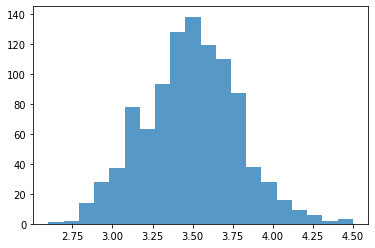

In [62]:
avgs_a, mu_a, sigma_a = section_4ab(1000, 30)

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

Empirical Mean = 3.501 STD = 0.076


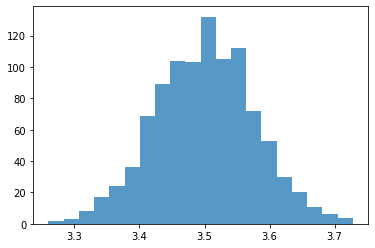

In [63]:
avgs_b, mu_b, sigma_b = section_4ab(1000, 500)

#### 4.C
Draw normal fit curves on your two histograms.

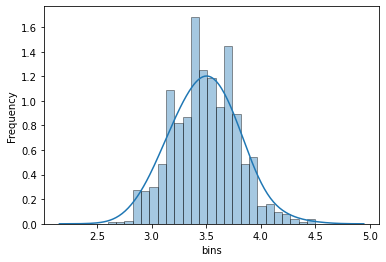

In [71]:
section_4c(avgs_a, mu_a, sigma_a)

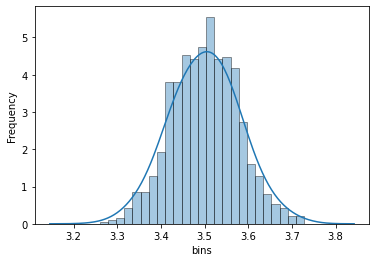

In [72]:
section_4c(avgs_b, mu_b, sigma_b)

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

#### 4.E - Bonus
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that **in our case**:
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

### Question 5 - Sampling of Kendall correlation (15 points)

Recall that the Naive time complexity of computing Kendall correlation is $O(n^2)$. We will investigate a sampling approach to approximate Kendall correlations efficiently. 

#### 5.A
Draw a sample of 10M samples from a bivariate distribution $(X,Y)\sim \mathcal{N}(\bf{0},S)$ with the covariance matrix $S=\begin{pmatrix} 2 & 3\\ 3 & 5 \end{pmatrix}$. <br>
Calculate the Kendall correlation $\tau(X,Y)$.
How long did this calculation take?

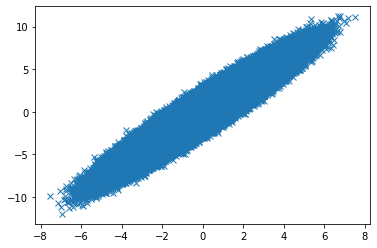

In [229]:
import matplotlib.pyplot as plt

MIL_ONE = 10000000

mean = [0, 0]
cov = [[2, 3], [3, 5]]

x, y = np.random.multivariate_normal(mean, cov, MIL_ONE).T
plt.plot(x, y, 'x')
# plt.axis('equal')
plt.show()

In [95]:
x[0], y[0]

(-2.7921750085781603, -3.9600469836448022)

#### 5.B
Sample 1,000 points from the data and calculate the Kendall correlation $\tau(U,V)$. 

In [308]:
import math
from functools import partial
from math import comb
from random import sample

sign = partial(math.copysign, 1)

def my_kendalltau(samples):
    concordant, discordant, x_tie_counter, y_tie_counter, n = 0, 0, 0, 0, len(samples)
    total = 0
    for idx_1, sample_1 in enumerate(samples, start=1):
        for idx_2, sample_2 in enumerate(samples, start=1):
            total += 1
            if idx_1 >= idx_2 or sample_1[0] == sample_2[0] or sample_1[1] == sample_2[1]:
                if sample_1[0] == sample_2[0]:
                    x_tie_counter += 1
                if sample_1[1] == sample_2[1]:
                    y_tie_counter += 1                    
                continue

            if sign(sample_2[0] - sample_1[0]) == sign(sample_2[1] - sample_1[1]):
                concordant += 1
            else:
                discordant += 1
    n_choose_2 = comb(n,2)
    
    # taking into consideration when we have a tie on x or y
    return round((concordant-discordant)/(math.sqrt(n_choose_2-x_tie_counter)*math.sqrt(n_choose_2-y_tie_counter)), 3)    


def get_samples(x, y, sample_size=1000, x_enumerated=False):
    enumerate_x = x    
    if not x_enumerated:
        enumerate_x = list(enumerate(x))
    x_sampled_with_idx = sample(enumerate_x, sample_size)
    idxes, xs = [x_idx[0] for x_idx in x_sampled_with_idx], [x_idx[1] for x_idx in x_sampled_with_idx]
    ys = list(y[idxes])
    return xs, ys
#     return [(round(sample[0],3), round(sample[1],3)) for sample in zip(xs, ys)]


def run_experiments(x, y, true_tau, sample_size=1000, num_of_experiments=1000):
    kendall_tau_values = []
    enumerate_x = list(enumerate(x))
    print(f"Running on sample size:{sample_size}")
    for idx, i in enumerate(range(n_times), start=1):
        xs, ys = get_samples(enumerate_x, y, sample_size, x_enumerated=True)
        tau, p_value = stats.kendalltau(xs, ys)
        kendall_tau_values.append(tau)
        assert(len(xs) == sample_size)
        
    bins=20
    (mu, sigma) = norm.fit(kendall_tau_values)
    print(f"Empirical Mean = {round(mu,3)} STD = {round(sigma,3)}, True Tau = {true_tau}")
    ax = sns.distplot(kendall_tau_values, bins=25, kde_kws=dict(bw=0.5), hist_kws= dict(edgecolor="k"))
    ax.set(xlabel='bins', ylabel='Frequency')

    plt.axvline(x=round(true_tau, 3), color='red', linestyle='-', lw=3)
    plt.axvline(x=round(mu,3)+round(sigma,3), color='green', linestyle='-', lw=3)
    plt.axvline(x=round(mu,3)-round(sigma,3), color='green', linestyle='-', lw=3)
    plt.show()
    
    return kendall_tau_values

10000000 10000000
Kendall tau value is: KendalltauResult(correlation=0.7981421421421422, pvalue=0.0), For this set of points:


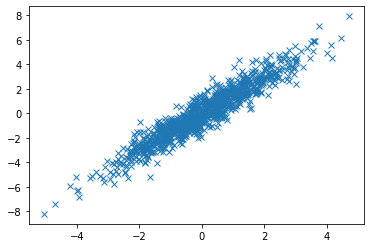

In [231]:
# samples = get_samples(x,y)
# print(f"Kendall tau value is: {my_kendalltau(samples)}, For this set of points:")
xs, ys = get_samples(x,y)
print(f"Kendall tau value is: {kendalltau(xs, ys)}, For this set of points:")

import matplotlib.pyplot as plt

plt.plot(xs, ys, 'x')
# plt.axis('equal')
plt.show()

In [234]:
len(y)

10000000

#### 5.C
Repeat Section 5.B 1000 times and plot a histogram of the calculated $\tau(U,V)$ values. Indicate the true $\tau(X,Y)$ (calculated on the entire 10M samples) on the histogram. What are the empirical mean and stadard deviation of the calculated $\tau(U,V)$ values?

In [252]:
n_times = 1000
kendall_tau_values = run_experiments(x, y, num_of_experiments=n_times)

In [253]:
kendall_tau_values[0]

0.8027827827827827

In [168]:
len(kendall_tau_values)
import pickle

with open('kendall_tau_values.pkl', 'wb') as f:
    pickle.dump(kendall_tau_values, f)

Empirical Mean = 0.795 STD = 0.007


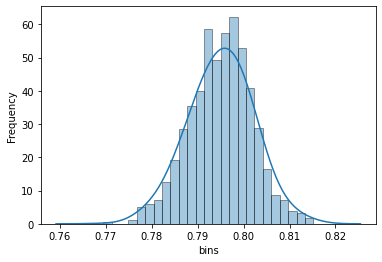

In [254]:
bins=20
# n, bins, patches = plt.hist(kendall_tau_values, bins, alpha=0.75)
(mu, sigma) = norm.fit(kendall_tau_values)
print("Empirical Mean = {} STD = {}".format(round(mu,3), round(sigma,3)))
# plt.show()

ax = sns.distplot(kendall_tau_values, bins=25, kde_kws=dict(bw=0.5), hist_kws= dict(edgecolor="k"))
ax.set(xlabel='bins', ylabel='Frequency')
plt.show()




In [173]:
data_set = [(round(sample[0],3), round(sample[1],3)) for sample in zip(x, y)]

In [174]:
import pickle

with open('data_set_10M.pkl', 'wb') as f:
    pickle.dump(data_set, f)
    
with open('x_10M.pkl', 'wb') as f:
    pickle.dump(x, f)
    
with open('y_10M.pkl', 'wb') as f:
    pickle.dump(y, f)    

In [187]:
import scipy.stats as stats

tau, p_value = stats.kendalltau(x, y)
true_tau = round(tau, 3)
true_tau

0.795

Empirical Mean = 0.795 STD = 0.007, True Tau = 0.795


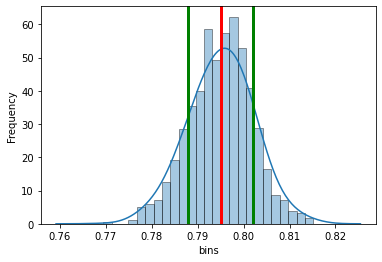

In [255]:
bins=20
# n, bins, patches = plt.hist(kendall_tau_values, bins, alpha=0.75)
(mu, sigma) = norm.fit(kendall_tau_values)
print(f"Empirical Mean = {round(mu,3)} STD = {round(sigma,3)}, True Tau = {true_tau}")
# plt.show()

ax = sns.distplot(kendall_tau_values, bins=25, kde_kws=dict(bw=0.5), hist_kws= dict(edgecolor="k"))
ax.set(xlabel='bins', ylabel='Frequency')

true_tau, true_p_value = stats.kendalltau(x, y)
plt.axvline(x=round(true_tau, 3), color='red', linestyle='-', lw=3)
plt.axvline(x=round(mu,3)+round(sigma,3), color='green', linestyle='-', lw=3)
plt.axvline(x=round(mu,3)-round(sigma,3), color='green', linestyle='-', lw=3)
plt.show()

#### 5.D
Repeat Section 5.C for samples of $m={10, 50, 100, 500, 1000, 5000}$ points. <br>
What is the naive time complexity of each calculation? <br>
Compare the empirical time complexity and the standard deviation of the calucated values to the size of the sample.

Running on sample size:10
Empirical Mean = 0.79 STD = 0.113, True Tau = 0.7950815318261533


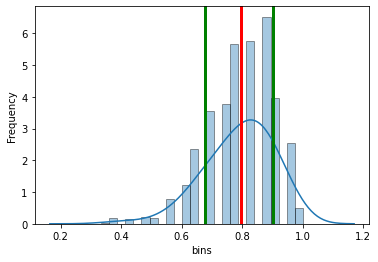

Running on sample size:50
Empirical Mean = 0.793 STD = 0.037, True Tau = 0.7950815318261533


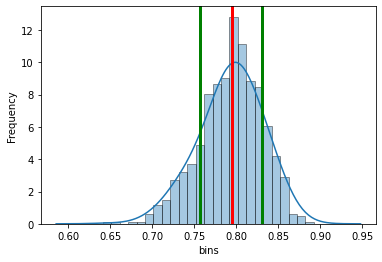

Running on sample size:100
Empirical Mean = 0.795 STD = 0.023, True Tau = 0.7950815318261533


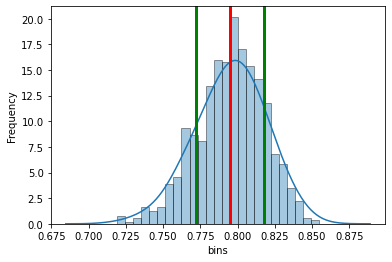

Running on sample size:500
Empirical Mean = 0.796 STD = 0.01, True Tau = 0.7950815318261533


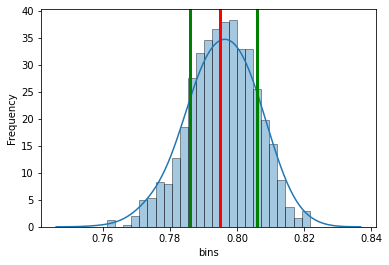

Running on sample size:1000
Empirical Mean = 0.795 STD = 0.007, True Tau = 0.7950815318261533


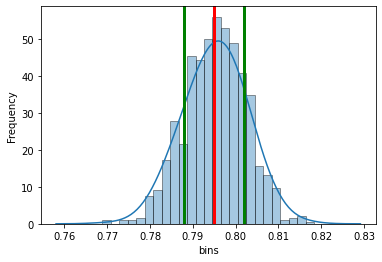

Running on sample size:5000
Empirical Mean = 0.795 STD = 0.003, True Tau = 0.7950815318261533


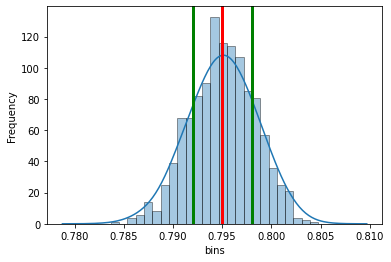

In [309]:
n_times = 1000
sample_sizes=[10,50,100,500,1000,5000]


true_tau, true_p_value = stats.kendalltau(x, y)
for sample_size in sample_sizes:
    kendall_tau_values = run_experiments(x, y, true_tau=true_tau, sample_size=sample_size, num_of_experiments=n_times)

#### 5.E
A coleague found an old dataset which she believes originated from the same popuation as the data in Section 5.A. The dataset is avaialble as "Kendall_data.csv". 

Using Kendall correlation and your answer to Section 5.D, how much confidence do you have in rejecting your coleague's claim? Explain your answer and show your calculation.

In [316]:
df = pd.read_csv("Kendall_data.csv", header=None, names=['x','y'])
x_from_file, y_from_file = np.array(df['x']), np.array(df['y'])

In [318]:
true_tau, true_p_value = stats.kendalltau(x_from_file, y_from_file)
true_tau

0.7806556689451707

In [320]:
len(x_from_file)


100

In [321]:
df

,x,y
0,-2.07,-2.83
1,2.12,3.46
2,-0.61,-1.54
3,-0.40,-0.57
4,0.05,-0.05
...,...,...
95,-0.41,-0.83
96,1.52,2.39
97,0.11,1.14
98,-0.95,-2.33
